# 🍷🍇 Analisis de vino

## 📚 Librerias

In [3]:
import pandas as pd
import pandas as pd
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Para prueba de Normalidad
from scipy.stats import shapiro, kstest, norm, normaltest

## 📄📥 Cargar el archivo

In [4]:
wine_white = "winequality-white.csv"
df = pd.read_csv(wine_white)
df.head(6)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine strain
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Sauvignon Blanc
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Chardonnay
2,2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Chardonnay
3,3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Chardonnay
4,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Sauvignon Blanc
5,5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Sauvignon Blanc


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4898 non-null   int64  
 1   fixed acidity         4898 non-null   float64
 2   volatile acidity      4898 non-null   float64
 3   citric acid           4898 non-null   float64
 4   residual sugar        4898 non-null   float64
 5   chlorides             4898 non-null   float64
 6   free sulfur dioxide   4898 non-null   float64
 7   total sulfur dioxide  4898 non-null   float64
 8   density               4898 non-null   float64
 9   pH                    4898 non-null   float64
 10  sulphates             4898 non-null   float64
 11  alcohol               4898 non-null   float64
 12  quality               4898 non-null   int64  
 13  wine strain           4898 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 535.8+ KB


### 🔍 Explorar datos Nulos NaN 

In [6]:
df.isnull().sum()

Unnamed: 0              0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine strain             0
dtype: int64

## 🧪 Prueba de hipotesis

### 🎯 Resolver problema 1 

Se desea comprobar si el promedio de acidez fija (fixed acidity) es mayor en los vinos Chardonnay que en los vinos Sauvignon Blanc. Formule una prueba de hipótesis y estudie está afirmación.

Se debe conocer la distribcuión Normal de la acidez fija en los vinos Chardonnay y Sauvignon Blanc

#### 🔔 Analisis Distribución Normal

In [7]:
sauvignon = df[df["wine strain"] == "Sauvignon Blanc"]["fixed acidity"]
chardonnay = df[df["wine strain"] == "Chardonnay"]["fixed acidity"]

**⚖️ Medidas de tendencia central**

In [8]:
sauvignon.describe()

count    2477.000000
mean        6.855349
std         0.855004
min         3.800000
25%         6.300000
50%         6.800000
75%         7.400000
max        14.200000
Name: fixed acidity, dtype: float64

In [9]:
chardonnay.describe()

count    1480.000000
mean        6.850068
std         0.829801
min         4.200000
25%         6.300000
50%         6.800000
75%         7.300000
max        10.700000
Name: fixed acidity, dtype: float64

In [10]:
m_ch=chardonnay.mean()
m_sa=sauvignon.mean()
print(f"La media de la acidez fija en ambos datos es de {round(m_ch,2)} g/L para la producción de Chardonnay y {round(m_sa,2)} g/L para la producción de Sauvignono Blanc")

La media de la acidez fija en ambos datos es de 6.85 g/L para la producción de Chardonnay y 6.86 g/L para la producción de Sauvignono Blanc


**🧮 Cantidad de datos**

In [11]:
chardonnay.info()
sauvignon.info()

<class 'pandas.core.series.Series'>
Index: 1480 entries, 1 to 4884
Series name: fixed acidity
Non-Null Count  Dtype  
--------------  -----  
1480 non-null   float64
dtypes: float64(1)
memory usage: 23.1 KB
<class 'pandas.core.series.Series'>
Index: 2477 entries, 0 to 4897
Series name: fixed acidity
Non-Null Count  Dtype  
--------------  -----  
2477 non-null   float64
dtypes: float64(1)
memory usage: 38.7 KB


**📊 Gráfico de normalidad**

**🍋🌿🧊 Sauvignon Blanc**

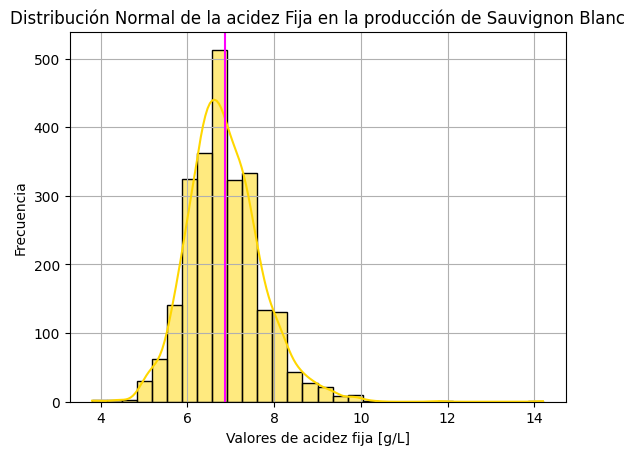

In [12]:
sns.histplot(sauvignon,bins=30,kde=True,color="gold")
plt.title("Distribución Normal de la acidez Fija en la producción de Sauvignon Blanc")
plt.axvline(m_sa,color='magenta',label=f'Media = {round(m_sa,3)}') # plt.axhline= linea horizontal, plt.axvline= linea vertical
plt.xlabel("Valores de acidez fija [g/L]")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

**📊 Gráfico de normalidad**

**🍏🧈🌞 Chardonnay**

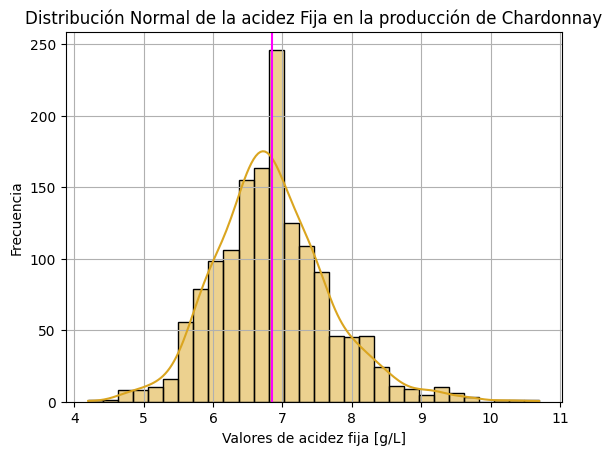

In [13]:
sns.histplot(chardonnay,bins=30,kde=True,color="goldenrod")
plt.title("Distribución Normal de la acidez Fija en la producción de Chardonnay")
plt.axvline(m_sa,color='magenta',label=f'Media = {round(m_sa,3)}') # plt.axhline= linea horizontal, plt.axvline= linea vertical
plt.xlabel("Valores de acidez fija [g/L]")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

**🧪 Test de Normalidad: Shapiro-Wilk, Kolmogorov-Smirnov y D'Agostino-Pearson** 

**🍏🧈🌞 Chardonnay**

In [14]:
print("Pruebas de Normalidad 🍏🧈🌞 Chardonnay")
# 🧪 Test de Shapiro-Wilk
stat_shapiro, p_shapiro = shapiro(chardonnay)
print(f"Shapiro-Wilk: Estadístico = {stat_shapiro:.4f}, p = {p_shapiro:.4f}")
if p_shapiro > 0.05:
    print("✅ Shapiro-Wilk: Normalidad NO rechazada.")
else:
    print("❌ Shapiro-Wilk: Se rechaza normalidad.")

# 📈 Test de Kolmogorov-Smirnov (ajustado a N(μ, σ))
mu, sigma = np.mean(chardonnay), np.std(chardonnay)
stat_ks, p_kstest = kstest(chardonnay, 'norm', args=(mu, sigma))
print(f"Kolmogorov-Smirnov: Estadístico = {stat_ks:.4f}, p = {p_kstest:.4f}")
if p_kstest > 0.05:
    print("✅ Kolmogorov-Smirnov: Normalidad NO rechazada.")
else:
    print("❌ Kolmogorov-Smirnov: Se rechaza normalidad.")

# 📉 D’Agostino y Pearson (normaltest)
stat_nt, p_normaltest = normaltest(chardonnay)
print(f"D’Agostino-Pearson: Estadístico = {stat_nt:.4f}, p = {p_normaltest:.4f}")
if p_normaltest > 0.05:
    print("✅ Normaltest: Normalidad NO rechazada.")
else:
    print("❌ Normaltest: Se rechaza normalidad.")

Pruebas de Normalidad 🍏🧈🌞 Chardonnay
Shapiro-Wilk: Estadístico = 0.9807, p = 0.0000
❌ Shapiro-Wilk: Se rechaza normalidad.
Kolmogorov-Smirnov: Estadístico = 0.0681, p = 0.0000
❌ Kolmogorov-Smirnov: Se rechaza normalidad.
D’Agostino-Pearson: Estadístico = 99.4113, p = 0.0000
❌ Normaltest: Se rechaza normalidad.


**🧪 Test de Normalidad: Shapiro-Wilk, Kolmogorov-Smirnov y D'Agostino-Pearson** 

**🍋🌿🧊 Sauvignon Blanc**

In [15]:
print("Pruebas de Normalidad 🍋🌿🧊 Sauvignon Blanc")
# 🧪 Test de Shapiro-Wilk
stat_shapiro, p_shapiro = shapiro(sauvignon)
print(f"Shapiro-Wilk: Estadístico = {stat_shapiro:.4f}, p = {p_shapiro:.4f}")
if p_shapiro > 0.05:
    print("✅ Shapiro-Wilk: Normalidad NO rechazada.")
else:
    print("❌ Shapiro-Wilk: Se rechaza normalidad.")

# 📈 Test de Kolmogorov-Smirnov (ajustado a N(μ, σ))
mu, sigma = np.mean(sauvignon), np.std(sauvignon)
stat_ks, p_kstest = kstest(sauvignon, 'norm', args=(mu, sigma))
print(f"Kolmogorov-Smirnov: Estadístico = {stat_ks:.4f}, p = {p_kstest:.4f}")
if p_kstest > 0.05:
    print("✅ Kolmogorov-Smirnov: Normalidad NO rechazada.")
else:
    print("❌ Kolmogorov-Smirnov: Se rechaza normalidad.")

# 📉 D’Agostino y Pearson (normaltest)
stat_nt, p_normaltest = normaltest(sauvignon)
print(f"D’Agostino-Pearson: Estadístico = {stat_nt:.4f}, p = {p_normaltest:.4f}")
if p_normaltest > 0.05:
    print("✅ Normaltest: Normalidad NO rechazada.")
else:
    print("❌ Normaltest: Se rechaza normalidad.")

Pruebas de Normalidad 🍋🌿🧊 Sauvignon Blanc
Shapiro-Wilk: Estadístico = 0.9715, p = 0.0000
❌ Shapiro-Wilk: Se rechaza normalidad.
Kolmogorov-Smirnov: Estadístico = 0.0652, p = 0.0000
❌ Kolmogorov-Smirnov: Se rechaza normalidad.
D’Agostino-Pearson: Estadístico = 372.1490, p = 0.0000
❌ Normaltest: Se rechaza normalidad.


#### ✅ Conclusión
A pesar de que la visualización mediante el gráfico KDE sugiere una distribución aproximadamente normal para los valores de acidez fija en ambas cepas de vino, los resultados obtenidos a partir de las pruebas formales de normalidad (Shapiro-Wilk, D’Agostino-Pearson, y Anderson-Darling) no permiten asumir que estas distribuciones sigan una distribución normal con un nivel de significancia del 5%. Esta discrepancia evidencia la importancia de complementar los análisis visuales con pruebas estadísticas. Por esta razón, se procederá a utilizar un diagrama de caja (boxplot) para examinar la presencia de valores atípicos (outliers) y analizar la dispersión de los datos de forma no paramétrica, lo que permitirá tomar decisiones más robustas en ausencia de normalidad.

**📦 Analisis de outliers**

 **🍏🧈🌞 Chardonnay**

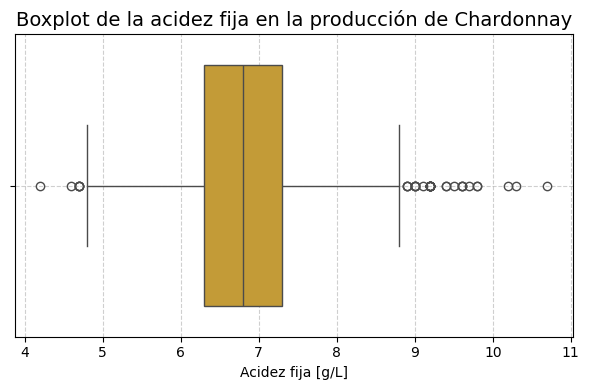

In [16]:
fig=plt.figure(figsize=(6,4))
sns.boxplot(x=chardonnay,color='goldenrod')

# Detalles visuales
plt.title('Boxplot de la acidez fija en la producción de Chardonnay', fontsize=14)
plt.xlabel('Acidez fija [g/L]')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**📦 Analisis de outliers**

**🍋🌿🧊 Sauvignon Blanc**

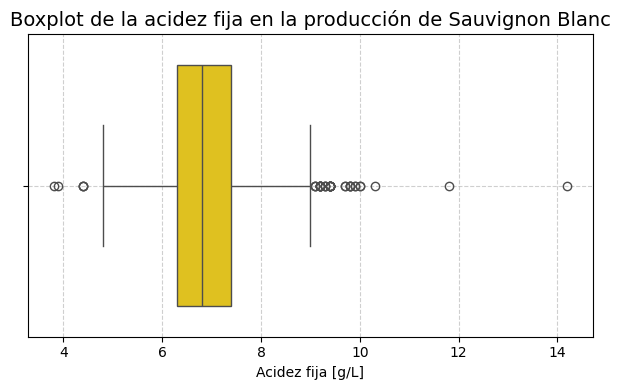

In [18]:
fig=plt.figure(figsize=(6,4))
sns.boxplot(x=sauvignon,color='gold')

# Detalles visuales
plt.title('Boxplot de la acidez fija en la producción de Sauvignon Blanc', fontsize=14)
plt.xlabel('Acidez fija [g/L]')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### ✅📦 Conclusión